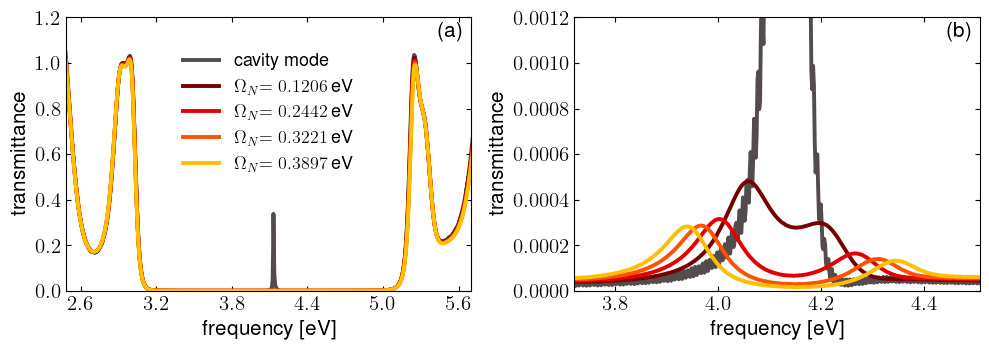

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import columnplots as clp
from scipy.optimize import curve_fit

def read_data(filename):
    data = np.loadtxt(filename, usecols=(0, 1))  # Read first and second columns
    col1, col2 = data[:, 0], data[:, 1]          # Split into two arrays
    return col1, col2

# Turn this parameter to False if LaTeX is not installed
if_latex = True

labels = []
xs=[]
ys=[]
xs2=[]
ys2=[]

### Data set 1
###---------------------------------------------------------------------------------------------------------------
file_numbers = [0,1,2,3,4]
Rabi_splitting = [0,
 0.0029159539363484005,
 0.00590452261306533,
 0.007788944723618102,
 0.009422110552763818]
# Initialize lists to store data from all files
def read_spectrum(filename):
    data = np.loadtxt(filename, usecols=(0, 2))  # Read first and third columns
    x = data[:, 0]  # First column
    y = data[:, 1]  # Third column
    return x, y

data_freq2 = []
data_spectrum2 = []

for number in file_numbers:
    filename = f"./SI/Figure5/Figure_a/data2_spectrum_gamma3_sigma_{number}.txt"
    x, y = read_spectrum(filename)  # Unpack the values
    data_freq2.append(x)
    data_spectrum2.append(y)

# Use the Paired colormap but remove the yellow color
cmap = plt.get_cmap('Paired')

# Ensure xs_Rabi and ys_Rabi are created from the collected data
xs_Rabi2 = data_freq2
xs_Rabi2 = np.array(xs_Rabi2)*41.357 # Rescaling in SI units
ys_Rabi2 = data_spectrum2  # Two identical datasets to plot with different styles

labels2 = ["cavity mode"]
for value in Rabi_splitting[1:]:
    labels2.append(r"$\Omega_{\mathrm{N}}$" + f"$= {value*41.357:.4f}$ eV")

labels2.extend(["Lorentz+TLS", ""])
###---------------------------------------------------------------------------------------------------------------

### Data set 2
###---------------------------------------------------------------------------------------------------------------
file_numbers = [0,1,2,3,4]
Rabi_splitting = [0,
 0.0029159539363484005,
 0.00590452261306533,
 0.007788944723618102,
 0.009422110552763818]
# Initialize lists to store data from all files
def read_spectrum(filename):
    data = np.loadtxt(filename, usecols=(0, 2))  # Read first and third columns
    x = data[:, 0]  # First column
    y = data[:, 1]  # Third column
    return x, y

data_freq = []
data_spectrum = []

for number in file_numbers:
    filename = f"./SI/Figure5/Figure_b/data_spectrum_gamma3_sigma_{number}.txt"
    x, y = read_spectrum(filename)  # Unpack the values
    data_freq.append(x)
    data_spectrum.append(y)

# Use the Paired colormap but remove the yellow color
cmap = plt.get_cmap('Paired')

# Ensure xs_Rabi and ys_Rabi are created from the collected data
xs_Rabi = data_freq
xs_Rabi = np.array(xs_Rabi)
xs_Rabi = xs_Rabi * 41.357
ys_Rabi = np.array(data_spectrum) # Two identical datasets to plot with different styles
colors2 = ["k", "k", "k", "k",'k']

labels2 = ["cavity mode"]
for value in Rabi_splitting[1:]:
    labels2.append(r"$\Omega_{N}$" + f"$= {value*41.357:.4f}$ eV")

labels2.extend(["Lorentz+TLS", ""])
alpha = [0.7,1.0,1.0,1.0,1.0]
###---------------------------------------------------------------------------------------------------------------

# Plotting using columnplots (clp)
axes = clp.initialize(col=1, row=2,
                    width=10, height=3.6,
                    LaTeX=if_latex, labelthem=True, labelsize=15, labelthemPosition=[0.98, 0.98], sharey=False,
                    fontsize=15)
            
for x_data, y_data, x_data2, y_data2, color, label, alpha in zip(xs_Rabi2, ys_Rabi2, xs_Rabi, ys_Rabi, colors2, labels2, alpha):
    clp.plotone([x_data], [y_data], axes[0], colors=[color], labels=[label], lw=2.8, alpha=alpha, ylog=False, xlog=False, xlim=(np.min(x_data[0]),5.7), ylim=(0,1.2),
                ylabel='transmittance', xlabel="frequency [eV]",
                showlegend=True, yscientificAtLabel=False)
    clp.plotone([x_data2], [y_data2], axes[1], colors=[color], labels=[label], lw=2.8, alpha=alpha, ylog=False, xlog=False, xlim=(0.09*41.357,0.109*41.357), ylim=(0.,0.0012),
                ylabel='transmittance', xlabel="frequency [eV]", 
                showlegend=False, yscientificAtLabel=False)

colormap = plt.cm.hot
colors2 = [colormap(i) for i in np.linspace(0.0,0.65,5)]
for i,j in enumerate(axes[0].lines[0:5]):
    j.set_color(colors2[i])
for i,j in enumerate(axes[1].lines[0:5]):
    j.set_color(colors2[i])
axes[0].set_xticks([2.6,3.2,3.8,4.4,5.,5.6])
axes[0].legend(loc='center', bbox_to_anchor=(0.5, 0.65), edgecolor='white',framealpha=0, fontsize=13)

clp.adjust(tight_layout=True, savefile="Transmittance_Gammae-3.pdf")


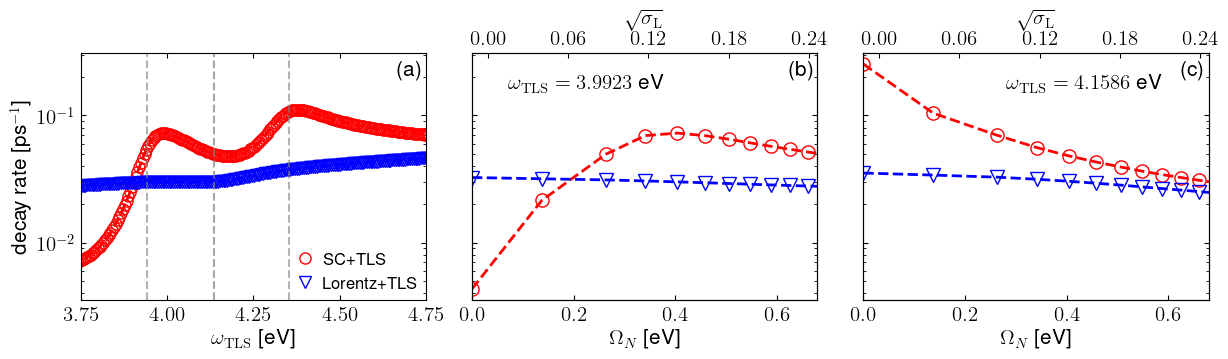

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import columnplots as clp
from scipy.optimize import curve_fit

# Exponential decay function
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

def read_data(filename):
    data = np.loadtxt(filename, usecols=(0, 1))  # Read first and second columns
    col1, col2 = data[:, 0], data[:, 1]          # Split into two arrays
    return col1, col2

# Turn this parameter to False if LaTeX is not installed
if_latex = True

# Frequency range and file numbers
freq_range = np.linspace(0.09, 0.115, 200)

x_decay = []
y_decay = []
x_decay2 = []
y_decay2 = []

x2_decay = []
y2_decay = []
x2_decay2 = []
y2_decay2 = []

x3_decay = []
y3_decay = []
x3_decay2 = []
y3_decay2 = []

#Saving data set 1
###---------------------------------------------------------------------------------------------------------------
for freq in freq_range:
    filename = "./SI/Figure6/Figure_a/trajEh_TLS_DECAY_C&LM_GAMMAe-3_SIGMA_20_TLSFrequency_%.6f.txt" %(freq)
    try:
        data1, data2 = read_data(filename)
        x_decay.append(data1)
        y_decay.append(data2)
    except OSError:
        print(f"File {filename} not found.")

for freq in freq_range:
    filename = "./SI/Figure6/Figure_a/trajEh_TLS_DECAY_LM_GAMMAe-3_SIGMA_20_TLSFrequency_%.6f.txt" %(freq)
    try:
        data1, data2 = read_data(filename)
        x_decay2.append(data1)
        y_decay2.append(data2)
    except OSError:
        print(f"File {filename} not found.")

fitting_params = {}
fitting_params2 = {}

b_values = []
b_values2 = []

for freq, x_exp, y_exp in zip(freq_range, x_decay, y_decay):
    if len(x_exp) > 0 and len(y_exp) > 0:
        def exp_decay_fixed(x, b):
            return 0.1 * np.exp(-b * x)
        try:
            popt, _ = curve_fit(exp_decay_fixed, x_exp, y_exp, p0=(0.001,))
            b_value = popt[0]
            b_values.append(b_value)
            fitting_params[round(freq, 5)] = b_value
        except RuntimeError:
            print(f"Could not fit data for frequency {freq}")

b_values = np.array(b_values)

for freq, x_exp, y_exp in zip(freq_range, x_decay2, y_decay2):
    if len(x_exp) > 0 and len(y_exp) > 0:
        def exp_decay_fixed(x, b):
            return 0.1 * np.exp(-b * x)
        try:
            popt, _ = curve_fit(exp_decay_fixed, x_exp, y_exp, p0=(0.001,))
            b_value = popt[0]
            b_values2.append(b_value)
            fitting_params2[round(freq, 5)] = b_value
        except RuntimeError:
            print(f"Could not fit data for frequency {freq}")

b_values2 = np.array(b_values2)

xs = [freq_range*41.357] * 4 # Rescaling in SI units
ys = [b_values*10000, b_values*10000] + [b_values2*10000, b_values2*10000] # Rescaling in SI units

colors = ["ro", "r--", "bv", "b--"]
labels = ["SC+TLS", "", "Lorentz+TLS", ""]
###---------------------------------------------------------------------------------------------------------------

#Saving data set 3
###---------------------------------------------------------------------------------------------------------------
freq_range2 = np.linspace(0.09200, 0.112, 35)
file_numbers = [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500] 
sigmas2 = np.array(file_numbers)*0.00001
Rabi_splitting = [0, 0.0033229999999999926, 0.006365999999999997, 0.008248000000000005, 0.009769999999999987, 0.011091000000000004, 0.012251999999999999, 0.013253000000000001, 0.014215000000000005, 0.01513500000000001, 0.015976000000000004, 0.016777]
Rabi_splitting = np.array(Rabi_splitting)

# Read data from each file and store in x_decay and y_decay
for number in file_numbers:
    filename = f"./SI/Figure6/Figure_c/trajEh_TLS_DECAY_C&LM_GAMMAe-3_SIGMA_{number}.txt"
    try:
        data1, data2 = read_data(filename)
        x2_decay.append(data1)
        y2_decay.append(data2)
    except OSError:
        print(f"File {filename} not found.")

# Read data from each file and store in x_decay and y_decay
for number in file_numbers:
    filename = f"./SI/Figure6/Figure_c/trajEh_TLS_DECAY_LM_GAMMAe-3_SIGMA_{number}.txt"
    try:
        data1, data2 = read_data(filename)
        x2_decay2.append(data1)
        y2_decay2.append(data2)
    except OSError:
        print(f"File {filename} not found.")

# Perform fitting on collected data, fitting only 'b', with 'a=0.1' and 'c=0'
fitting_params_Rabi = {}
b_values_Rabi = []
fitting_params_Rabi2 = {}
b_values_Rabi2 = []

for freq, x_exp, y_exp in zip(freq_range2, x2_decay, y2_decay):
    if len(x_exp) > 0 and len(y_exp) > 0:
        # Fix 'a' and 'c' parameters for fitting
        def exp_decay_fixed(x, b):
            return 0.1 * np.exp(-b * x)

        try:
            popt, _ = curve_fit(exp_decay_fixed, x_exp, y_exp, p0=(0.001,))
            b_value = popt[0]
            b_values_Rabi.append(b_value)
            fitting_params_Rabi[round(freq, 5)] = b_value
        except RuntimeError:
            print(f"Could not fit data for frequency {freq}")

for freq, x_exp, y_exp in zip(freq_range2, x2_decay2, y2_decay2):
    if len(x_exp) > 0 and len(y_exp) > 0:
        # Fix 'a' and 'c' parameters for fitting
        def exp_decay_fixed(x, b):
            return 0.1 * np.exp(-b * x)

        try:
            popt, _ = curve_fit(exp_decay_fixed, x_exp, y_exp, p0=(0.001,))
            b_value = popt[0]
            b_values_Rabi2.append(b_value)
            fitting_params_Rabi2[round(freq, 5)] = b_value
        except RuntimeError:
            print(f"Could not fit data for frequency {freq}")

# Optionally save b values to an array for further use
b_values_Rabi = np.array(b_values_Rabi)
b_values_Rabi2 = np.array(b_values_Rabi2)

# Ensure b_values and freq_range have the same length
xs_Rabi = [Rabi_splitting*41.357] * 2 + [Rabi_splitting*41.357] * 2 # Rescaling in SI units
ys_Rabi = [b_values_Rabi*10000, b_values_Rabi*10000, b_values_Rabi2*10000, b_values_Rabi2*10000]  # Two identical datasets to plot with different styles and rescaling

colors2 = ["ro", "r--", "bv", "b--"]
labels2 = ["SC+TLS", "", "Lorentz+TLS", ""]
###---------------------------------------------------------------------------------------------------------------

#Saving data set 2
###---------------------------------------------------------------------------------------------------------------
file_numbers2 = np.array([0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500])  # Changed from np.linspace(0, 34, 35) to np.arange(35)
sigmas = file_numbers2*0.00001
Rabi_splitting2 = [0, 0.0033229999999999926, 0.006365999999999997, 0.008248000000000005, 0.009769999999999987, 0.011091000000000004, 0.012251999999999999, 0.013253000000000001, 0.014215000000000005, 0.01513500000000001, 0.015976000000000004, 0.016777]
Rabi_splitting2 = np.array(Rabi_splitting2)
Rabi_splitting3 = np.array(Rabi_splitting2)*41.357
# Read data from each file and store in x_decay and y_decay
for number in file_numbers2:
    filename =  f"./SI/Figure6/Figure_b/trajEh_LP_DECAY_C&LM_GAMMAe-3_SIGMA_{number}.txt"
    try:
        data1, data2 = read_data(filename)
        x3_decay.append(data1)
        y3_decay.append(data2)
    except OSError:
        print(f"File {filename} not found.")

# Read data from each file and store in x_decay and y_decay
for number in file_numbers2:
    filename =  f"./SI/Figure6/Figure_b/trajEh_LP_DECAY_LM_GAMMAe-3_SIGMA_{number}.txt"
    try:
        data1, data2 = read_data(filename)
        x3_decay2.append(data1)
        y3_decay2.append(data2)
    except OSError:
        print(f"File {filename} not found.")

# Perform fitting on collected data, fitting only 'b', with 'a=0.1' and 'c=0'
fitting_params_LP = {}
b_values_LP = []

fitting_params_LP2 = {}
b_values_LP2 = []

for freq, x_exp, y_exp in zip(file_numbers2, x3_decay, y3_decay):
    if len(x_exp) > 0 and len(y_exp) > 0:
        # Fix 'a' and 'c' parameters for fitting
        def exp_decay_fixed(x, b):
            return 0.1 * np.exp(-b * x)

        try:
            popt, _ = curve_fit(exp_decay_fixed, x_exp, y_exp, p0=(0.001,))
            b_value = popt[0]
            b_values_LP.append(b_value)
            fitting_params_LP[round(freq, 5)] = b_value
        except RuntimeError:
            print(f"Could not fit data for frequency {freq}")

for freq, x_exp, y_exp in zip(file_numbers2, x3_decay2, y3_decay2):
    if len(x_exp) > 0 and len(y_exp) > 0:
        # Fix 'a' and 'c' parameters for fitting
        def exp_decay_fixed(x, b):
            return 0.1 * np.exp(-b * x)

        try:
            popt, _ = curve_fit(exp_decay_fixed, x_exp, y_exp, p0=(0.001,))
            b_value = popt[0]
            b_values_LP2.append(b_value)
            fitting_params_LP2[round(freq, 5)] = b_value
        except RuntimeError:
            print(f"Could not fit data for frequency {freq}")

# Optionally save b values to an array for further use
b_values_LP = np.array(b_values_LP)
b_values_LP2 = np.array(b_values_LP2)

# Ensure b_values and freq_range have the same length
xs_LP = [Rabi_splitting2*41.357] * 2 + [Rabi_splitting2*41.357] * 2
ys_LP = [b_values_LP*10000, b_values_LP*10000, b_values_LP2*10000, b_values_LP2*10000]  # Two identical datasets to plot with different styles

colors3 = ["ro", "r--", "bv", "b--"]
labels3 = ["SC+TLS", "", "Lorentz+TLS", ""]
###---------------------------------------------------------------------------------------------------------------

# Plotting using columnplots (clp)
axes = clp.initialize(col=1, row=3,
                    width=12.4, height=3.7,
                    LaTeX=True, labelthem=True, labelsize=15, labelthemPosition=[0.99, 0.97], sharey=True, 
                    fontsize=15)

# 2. Plot each figure
clp.plotone(xs, ys, axes[0], colors=colors, labels=labels, lw=2, markersize=8, ylog=True, bothyticks=True, xlim=(3.75, 4.75),
            ylabel=r'decay rate [ps$^{-1}$]', xlabel="$\\omega_{{\\mathrm{{TLS}}}}$ [eV]",
            showlegend=True, legendloc="lower right", yscientificAtLabel=False)
clp.plotone(xs_Rabi, ys_Rabi, axes[2], colors=colors2, labels=labels2, lw=2, markersize=9.5, ylog=True,
            xlabel="$\\Omega_{{N}}$ [eV]", xlim=[np.min(xs_Rabi[0]), 0.68],
            showlegend=False, yscientificAtLabel=False)
clp.plotone(xs_LP, ys_LP, axes[1], colors=colors3, labels=labels3, lw=2, markersize=9.5, ylog=True,
            xlabel="$\\Omega_{{N}}$ [eV]", xlim=[np.min(xs_LP[0]), 0.68],
            showlegend=False, yscientificAtLabel=False)

axes[0].axvline(x=0.095305*41.357, color='gray', linestyle='--', alpha=0.6)
axes[0].axvline(x=0.105283*41.357, color='gray', linestyle='--', alpha=0.6)
axes[0].axvline(x=0.10*41.357, color='gray', linestyle='--', alpha=0.7)
axes[0].legend(loc='center', bbox_to_anchor=(0.79, 0.115), edgecolor='white', fontsize=12, framealpha=0, handletextpad=0.05)
axes[0].tick_params(axis='y',direction='in', which='both')
axes[0].set_xticks([3.75,4.00,4.25,4.5,4.75])
axes[2].tick_params(axis='y',direction='in', which='both')
axes[1].tick_params(axis='y',direction='in', which='both')
axes[2].text(0.28,1.6e-1, r'$\omega_{\mathrm{TLS}}= 4.1586$ eV', fontsize=15)
axes[1].text(0.07,1.6e-1, r'$\omega_{\mathrm{TLS}}= 3.9923$ eV', fontsize=15)
axes[1].xaxis.set_ticks_position('bottom')

ax2 = axes[1].twiny()
ax2.plot(np.sqrt(sigmas),b_values_LP2*10000, color='w', marker='o', alpha=0)
ax2.set_xticks([0,0.06, 0.12, 0.18,0.24])
ax2.tick_params(axis='x',direction='in', which='both')
ax2.set_xlabel(r"$\sqrt{\sigma_{\mathrm{L}}}$") 
ax3 = axes[2].twiny()
ax3.plot(np.sqrt(sigmas2),b_values_Rabi2*10000, color='w', marker='o', alpha=0)
ax3.set_xticks([0,0.06, 0.12, 0.18,0.24])
ax3.tick_params(axis='x',direction='in', which='both')
ax3.set_xlabel(r"$\sqrt{\sigma_{\mathrm{L}}}$") 

clp.adjust(tight_layout=True, savefile="DecayRates_gamma_e-3_combined.pdf")

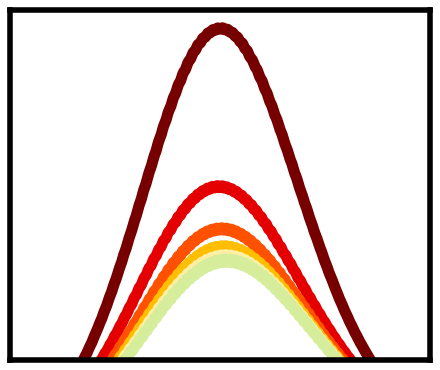

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import columnplots as clp
from scipy.optimize import curve_fit

def read_data(filename):
    data = np.loadtxt(filename, usecols=(0, 1))  # Read first and second columns
    col1, col2 = data[:, 0], data[:, 1]          # Split into two arrays
    return col1, col2

if_latex = False

# Frequency range and file numbers

#Saving data set 1
###---------------------------------------------------------------------------------------------------------------
def moving_average2(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Exponential decay function
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

xs2=[]
ys2=[]
x_smooth2 = []
y_smooth2 = []
labels2 = []
colors = ["k", "tab:cyan", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:blue"]

sigma_numbers = [5,10,15,20,25,30,35]
Rabi_splitting2 = [0.10407035175879398-0.09816582914572865, 0.10507537688442212-0.09728643216080402, 0.10595477386934674-0.09653266331658292,0.10670854271356783-0.09603015075376885,0.10733668341708544-0.09552763819095478, 0.10796482412060301-0.09502512562814071]


# Collect data for fitting
all_x_filtered2 = []
all_y_filtered2 = []
rabi_values2 = []


for number, rabi in zip(sigma_numbers, Rabi_splitting2):
    filename = f"./SI/Figure7/Figure_b/EM_Energy_UP_Gammae-3_Sigma_{number}.txt"
    data1, data2 = read_data(filename)

    y_smooth2 = moving_average2(data2, 200)
    x_smooth2 = data1[:len(y_smooth2)]

    num_points = 200
    indices = np.linspace(0, len(y_smooth2) - 1, num_points, dtype=int)

    y_smooth_norm = y_smooth2 / np.max(y_smooth2)

    x_filtered = [x_val for x_val in x_smooth2 if x_val > 5000]
    y_filtered = [y_smooth_norm[i] for i in range(len(x_smooth2)) if x_smooth2[i] > 5000]

    # Store data for later fitting
    all_x_filtered2.append(x_filtered)
    all_y_filtered2.append(y_filtered)
    rabi_values2.append(round(rabi, 4))

    # Store smoothed data for plotting
    xs2.append(x_smooth2)
    ys2.append(y_smooth2)

    labels2.append("SC $| \\omega_{{LP}} - \\omega_{{UP}} |$=" + f"{format(rabi, '.4f')}")

ax = clp.initialize(col=1, row=1,
                    width=4.5, height=3.8,
                    LaTeX=if_latex, fontname="Times New Roman",
                    fontsize=22)

# 2. Plot each figure
clp.plotone(xs2, ys2, ax, lw=8, ylog=False, colors=colors, xlim=(2400,5000), ylim=(2.7*10**(-5),14*10**(-5)),
            showlegend=False, legendloc="lower right", yscientificAtLabel=False)

colormap = plt.cm.hot
colors2 = [colormap(i) for i in np.linspace(0.0,0.65,5)]
colors2 = colors2[1:]
for i,j in enumerate(ax.lines[0:4]):
    j.set_color(colors2[i])

colormap = plt.cm.Spectral
colors2 = [colormap(i) for i in np.linspace(0.45,0.8,3)]
for i,j in enumerate(ax.lines[4:7]):
    j.set_color(colors2[i])
    


ax.tick_params(axis='y',direction='out')
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.set_yticks([])
ax.set_xticks([])
clp.adjust(tight_layout=True, savefile="Energy_zoom3.png")

/var/folders/gn/4nhvlhyn31q87bh098tdyryc0000gn/T/ipykernel_3836/2843656029.py:22: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
/var/folders/gn/4nhvlhyn31q87bh098tdyryc0000gn/T/ipykernel_3836/2843656029.py:22: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x) + c


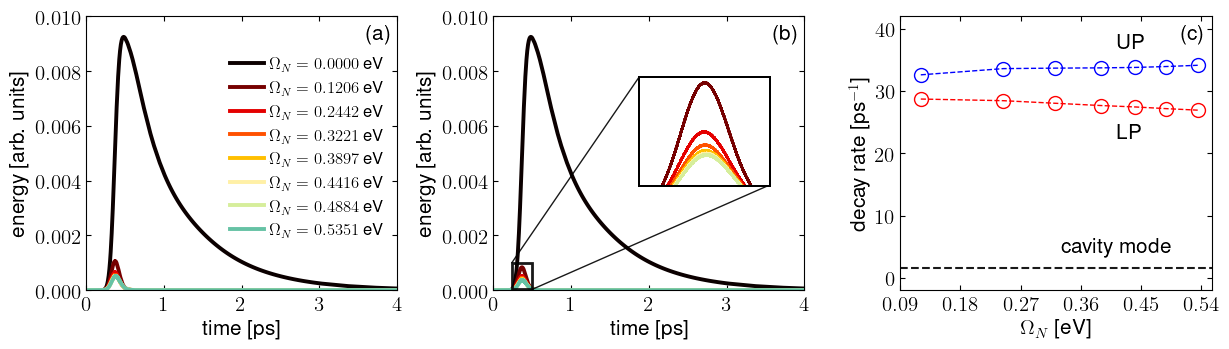

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import columnplots as clp
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

def read_data(filename):
    data = np.loadtxt(filename, usecols=(0, 1))  # Read first and second columns
    col1, col2 = data[:, 0], data[:, 1]          # Split into two arrays
    return col1, col2

# Turn this parameter to False if LaTeX is not installed
if_latex = True

#Saving data set 1
###---------------------------------------------------------------------------------------------------------------
def moving_average2(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Exponential decay function
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

xs=[]
ys=[]
x_smooth = []
y_smooth = []
labels = []
colors = ["grey", "tab:cyan", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:blue"]

sigma_numbers = [5,10,15,20,25,30,35]
Rabi_splitting1 = [0.101461+0.0009065921273031866-(0.098138+0.0013136381909547717),0.10407035175879398-0.09816582914572865, 0.10507537688442212-0.09728643216080402, 0.10595477386934674-0.09653266331658292,0.10670854271356783-0.09603015075376885,0.10733668341708544-0.09552763819095478, 0.10796482412060301-0.09502512562814071]
Rabi_splitting1 = np.array(Rabi_splitting1)*41.357 # Rescaling

# Collect data for fitting
all_x_filtered = []
all_y_filtered = []
rabi_values = []

filename = "./SI/Figure7/Figure_b/EM_Energy_UP_Gammae-3_Sigma_0.txt"
data1, data2 = read_data(filename)

y_smooth = moving_average2(data2, 200)
x_smooth = data1[:len(y_smooth)]

y_smooth_norm = y_smooth / np.max(y_smooth)

# Store smoothed data for plotting
xs.append(x_smooth)
ys.append(y_smooth)

labels.append("$ \\Omega_N = 0.0000$ eV")


for number, rabi in zip(sigma_numbers, Rabi_splitting1):
    filename = f"./SI/Figure7/Figure_b/EM_Energy_UP_Gammae-3_Sigma_{number}.txt"
    data1, data2 = read_data(filename)

    y_smooth = moving_average2(data2, 200)
    x_smooth = data1[:len(y_smooth)]

    y_smooth_norm = y_smooth / np.max(y_smooth)

    x_filtered = [x_val for x_val in x_smooth if x_val > 5000]
    y_filtered = [y_smooth_norm[i] for i in range(len(x_smooth)) if x_smooth[i] > 5000]

    # Store data for later fitting
    all_x_filtered.append(x_filtered)
    all_y_filtered.append(y_filtered)
    rabi_values.append(round(rabi, 4))

    # Store smoothed data for plotting
    xs.append(x_smooth)
    ys.append(y_smooth)

    labels.append("$ \\Omega_N = $ " + f"${format(rabi, '.4f')}$ eV")

# Perform fitting on collected data
fitting_params = {}
b_values = []  # Array to store the b fitting values

for rabi, x_filtered, y_filtered in zip(rabi_values, all_x_filtered, all_y_filtered):
    if len(x_filtered) > 0 and len(y_filtered) > 0:
        popt, _ = curve_fit(exp_decay, x_filtered, y_filtered, p0=(1, 0.001, 0))
        fitting_params[rabi] = popt
        b_values.append(popt[1])  # Store the b value

b_values = np.array(b_values)*10000

###---------------------------------------------------------------------------------------------------------------

#Saving data set 2
###---------------------------------------------------------------------------------------------------------------
xs2=[]
ys2=[]
x_smooth2 = []
y_smooth2 = []
labels2 = []
colors = ["k","k","tab:cyan", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:blue"]
Rabi_splitting2 = [0.101461+0.0009065921273031866-(0.098138+0.0013136381909547717),0.10407035175879398-0.09816582914572865, 0.10507537688442212-0.09728643216080402, 0.10595477386934674-0.09653266331658292,0.10670854271356783-0.09603015075376885,0.10733668341708544-0.09552763819095478, 0.10796482412060301-0.09502512562814071]


# Collect data for fitting
all_x_filtered2 = []
all_y_filtered2 = []
rabi_values2 = []

filename = "./SI/Figure7/Figure_a/EM_Energy_LP_Gammae-3_Sigma_0.txt"
data1, data2 = read_data(filename)

y_smooth2 = moving_average2(data2, 200)
x_smooth2 = data1[:len(y_smooth2)]

y_smooth_norm = y_smooth2 / np.max(y_smooth2)

# Store smoothed data for plotting
xs2.append(x_smooth2)
ys2.append(y_smooth2)

labels2.append("$\\Omega_N$ = 0.0000")


for number, rabi in zip(sigma_numbers, Rabi_splitting2):
    filename = f"./SI/Figure7/Figure_a/EM_Energy_LP_Gammae-3_Sigma_{number}.txt"
    data1, data2 = read_data(filename)

    y_smooth2 = moving_average2(data2, 200)
    x_smooth2 = data1[:len(y_smooth2)]

    y_smooth_norm = y_smooth2 / np.max(y_smooth2)

    x_filtered = [x_val for x_val in x_smooth2 if x_val > 5000]
    y_filtered = [y_smooth_norm[i] for i in range(len(x_smooth2)) if x_smooth2[i] > 5000]

    # Store data for later fitting
    all_x_filtered2.append(x_filtered)
    all_y_filtered2.append(y_filtered)
    rabi_values2.append(round(rabi, 4))

    # Store smoothed data for plotting
    xs2.append(x_smooth2)
    ys2.append(y_smooth2)

    labels2.append("SC $| \\omega_{{LP}} - \\omega_{{UP}} |$=" + f"{format(rabi, '.4f')}")

# Perform fitting on collected data
fitting_params2 = {}
b_values2 = []  # Array to store the b fitting values

for rabi, x_filtered, y_filtered in zip(rabi_values2, all_x_filtered2, all_y_filtered2):
    if len(x_filtered) > 0 and len(y_filtered) > 0:
        popt, _ = curve_fit(exp_decay, x_filtered, y_filtered, p0=(1, 0.001, 0))
        fitting_params2[rabi] = popt
        b_values2.append(popt[1])  # Store the b value

b_values2 = np.array(b_values2)*10000
###---------------------------------------------------------------------------------------------------------------
xs2 = np.array(xs2)*0.00010
ys2 = np.array(ys2)*1e-18*6.242e+18
xs = np.array(xs)*0.00010
ys = np.array(ys)*1e-18*6.242e+18

#Saving data set 3
###---------------------------------------------------------------------------------------------------------------
# Define file paths
empty_xs=[]
empty_ys=[]
filtered_empty_xs=[]
filtered_empty_ys=[]

filename = "./SI/Figure7/Figure_a/EM_Energy_LP_Gammae-3_Sigma_0.txt"
data1, data2 = read_data(filename)

empty_y_smooth = moving_average2(data2, 200)
empty_x_smooth = data1[:len(empty_y_smooth)]

# Store smoothed data for plotting
empty_xs.append(empty_x_smooth)
empty_ys.append(empty_y_smooth)

y_smooth_norm = empty_y_smooth / np.max(empty_y_smooth)

x_filtered = [x_val for x_val in empty_x_smooth if x_val > 5000]
y_filtered = [y_smooth_norm[i] for i in range(len(empty_x_smooth)) if empty_x_smooth[i] > 5000]

# Store data for later fitting
filtered_empty_xs.append(x_filtered)
filtered_empty_ys.append(y_filtered)

fitting_params3 = {}
b_values3 = []  # Array to store the b fitting values

for x_filtered, y_filtered in zip(filtered_empty_xs, filtered_empty_ys):
    if len(x_filtered) > 0 and len(y_filtered) > 0:
        popt, _ = curve_fit(exp_decay, x_filtered, y_filtered, p0=(1, 0.001, 0))
        fitting_params3[rabi] = popt
        b_values3.append(popt[1])  # Store the b value

b_values3 = np.array(b_values3)*10000

empty_rate = b_values3[0]

xs3 = [Rabi_splitting1]*4
ys3 = [b_values, b_values, b_values2, b_values2]

# Define colors, labels, and alpha values
colors3 = ["b--", "bo", "r--", "ro"]
labels3 = ["UP", "", "LP", ""]

###---------------------------------------------------------------------------------------------------------------

# Plotting using columnplots (clp)

axes = clp.initialize(col=1, row=3,
                    width=12.4, height=3.6,
                    LaTeX=if_latex, labelthem=True, labelsize=15, labelthemPosition=[0.98, 0.97], 
                    fontsize=15)

# 2. Plot each figure
clp.plotone(xs2, ys2, axes[0], colors=colors, labels=labels, lw=2.8, ylog=False, xlim=(0,4), ylim=(0., 0.01),
            showlegend=True, ylabel='energy [arb. units]', xlabel="time [ps]", legendloc="lower right", yscientificAtLabel=False)
clp.plotone(xs, ys, axes[1], labels=labels, lw=2.8, ylog=False, colors=colors, xlim=(0,4), ylim=(0., 0.01),
            showlegend=False, ylabel='energy [arb. units]', xlabel="time [ps]", legendloc="lower right", yscientificAtLabel=False)
clp.plotone(xs3, ys3, axes[2], colors=colors3, labels=labels3, lw=1, ylog=False, markersize=10, ylim=(-2,42), 
            ylabel=r'decay rate [ps$^{-1}$]', xlabel="$\\Omega_{{N}}$ [eV]",
            showlegend=False, yscientificAtLabel=False)

colormap = plt.cm.hot
colors2 = [colormap(i) for i in np.linspace(0.0,0.65,5)]
for i,j in enumerate(axes[0].lines[0:5]):
    j.set_color(colors2[i])
for i,j in enumerate(axes[1].lines[0:5]):
    j.set_color(colors2[i])
colormap = plt.cm.Spectral
colors2 = [colormap(i) for i in np.linspace(0.45,0.8,3)]
for i,j in enumerate(axes[0].lines[5:8]):
    j.set_color(colors2[i])
for i,j in enumerate(axes[1].lines[5:8]):
    j.set_color(colors2[i])

clp.add_figure('Energy_zoom3.png',axes[1],zoom=0.0745, location=(2.715,9.47e+2*1e-18*6.13e+18*1e-6))
axes[0].tick_params(axis='y',direction='in')
axes[1].tick_params(axis='y',direction='in')
axes[2].tick_params(axis='y',direction='in')
axes[0].legend(loc='center', bbox_to_anchor=(0.71, 0.52), edgecolor='white', framealpha=0, fontsize=12,handletextpad=0.3)
axes[2].set_xticks([0.09,0.18,0.27,0.36,0.45,0.54])
energy_ticks = [0,0.850,01.700,2.550]

x1, x2, y1, y2 = 0.240, 0.5000, 2.7*10**(-5), 100*10**(-5)  # (x_min, x_max, y_min, y_max)
# Create inset axes
x0, y0, width, height = 0.47, 0.38, 0.41, 0.4  # Adjust as needed

# Create inset axes at specific coordinates
ax_inset = axes[1].inset_axes([x0,y0,width,height], xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[],zorder=-5)  # Adjust size and location
ax_inset.set_xticks([])
ax_inset.set_yticks([])
ax_inset.set_title('')
axes[1].indicate_inset_zoom(ax_inset, edgecolor="black",linewidth=2, ec='black', ls='-', fc='none', alpha=0.9)
axes[2].axhline(y=empty_rate, color='k', linestyle='--', alpha=0.9)
axes[2].text(0.010*41.357,37, 'UP', fontsize=15)
axes[2].text(0.010*41.357,22.5, 'LP', fontsize=15)
axes[2].text(0.008*41.357,4*1e-0, 'cavity mode', fontsize=15)

clp.adjust(tight_layout=True, savefile="polariton_relaxation_gammae-3.pdf")


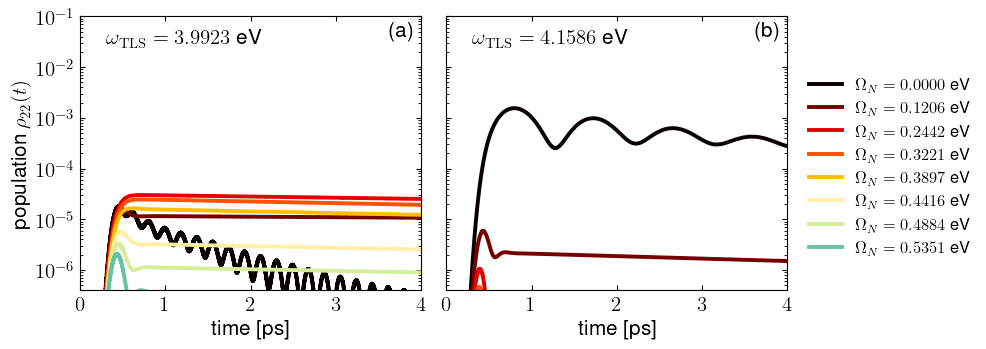

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import columnplots as clp
from scipy.optimize import curve_fit

def read_data(filename):
    data = np.loadtxt(filename, usecols=(0, 1))  # Read first and second columns
    col1, col2 = data[:, 0], data[:, 1]          # Split into two arrays
    return col1, col2

if_latex = True
labels = []
xs=[]
ys=[]
xs2=[]
ys2=[]

###---------------------------------------------------------------------------------------------------------------
sigma_numbers=[0,5,10,15,20,25,30,35]
Rabi = [0,
 0.0029159539363484005,
 0.00590452261306533,
 0.007788944723618102,
 0.009422110552763818,
 0.010678391959798986,
 0.01180904522613066,
 0.012939698492462307]
for number, rabi in zip(sigma_numbers, Rabi):
    filename = f"./SI/Figure8/Figure_a/EM_Traj2_LP_Gammae-3_Sigma_{number}.txt"
    data1, data2 = read_data(filename)
    xs.append(data1*0.0001)
    ys.append(data2)
    labels.append("$ \\Omega_{{N}} = %.4f$ eV" %(rabi*41.357))

# Define colors, labels, and alpha values
colors = ["k", "k", "k","k","k","k","k","k"]
linestyles = ["-", "-", "-","-","-","-","-","-"]

###---------------------------------------------------------------------------------------------------------------

###---------------------------------------------------------------------------------------------------------------
sigma_numbers=[0,5,10,15,20,25,30,35]
Rabi = [0,
 0.0029159539363484005,
 0.00590452261306533,
 0.007788944723618102,
 0.009422110552763818,
 0.010678391959798986,
 0.01180904522613066,
 0.012939698492462307]
for number, rabi in zip(sigma_numbers, Rabi):
    filename = f"./SI/Figure8/Figure_b/EM_Traj_CM_Gammae-3_Sigma_{number}.txt"
    data1, data2 = read_data(filename)
    xs2.append(data1*0.0001)
    ys2.append(data2)

# Define colors, labels, and alpha values
colors2 = ["k", "k", "k","k","k","k","k","k"]
###---------------------------------------------------------------------------------------------------------------

# Plotting using columnplots (clp)

axes = clp.initialize(col=1, row=2,
                    width=10, height=3.6,
                    LaTeX=if_latex, labelthem=True, labelsize=15, labelthemPosition=[0.98, 0.98], sharey=True,
                    fontsize=15)
clp.plotone(xs, ys, axes[0], colors=colors, labels=labels, lw=2.8, ylog=True, xlog=False, linestyles=linestyles,  xlim=(0,4),  ylim=(0.4e-6,1e-1),
            ylabel=r'population $\rho_{22}(t)$', xlabel=r"time [ps]",
            showlegend=False, yscientificAtLabel=False)
clp.plotone(xs2, ys2, axes[1], colors=colors2, labels=labels, lw=2.8, ylog=True, xlog=False, linestyles=linestyles,  xlim=(0,4), 
            xlabel=r"time [ps]",
            showlegend=True, yscientificAtLabel=False)

colormap = plt.cm.hot
colors2 = [colormap(i) for i in np.linspace(0.0,0.65,5)]
colors3 = [colormap(i) for i in np.linspace(0.0,0.65,5)]
for i,j in enumerate(axes[0].lines[0:5]):
    j.set_color(colors2[i])
for i,j in enumerate(axes[1].lines[0:5]):
    j.set_color(colors3[i])
colormap = plt.cm.Spectral
colors2 = [colormap(i) for i in np.linspace(0.45,0.8,3)]
colors3 = [colormap(i) for i in np.linspace(0.45,0.8,3)]
for i,j in enumerate(axes[0].lines[5:8]):
    j.set_color(colors2[i])
for i,j in enumerate(axes[1].lines[5:8]):
    j.set_color(colors3[i])

axes[0].tick_params(axis='y',direction='in', which='both')
axes[1].tick_params(axis='y',direction='in', which='both')
axes[0].tick_params(axis='x',direction='in', which='both')
axes[1].legend(loc='center', bbox_to_anchor=(1.3, 0.45), framealpha=0.0, edgecolor='black', fontsize=11.8)
axes[1].text(0.3,2.85e-2, r'$\omega_{\mathrm{TLS}}= 4.1586$ eV', fontsize=15)
axes[0].text(0.3,2.85e-2, r'$\omega_{\mathrm{TLS}}= 3.9923$ eV', fontsize=15)

clp.adjust(tight_layout=True, savefile="TLS_Pulse_CF_Gamma_1e-3.pdf")
